In [20]:
import pickle
import networkx
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
with open('base_data/G_98-18.p', 'rb') as f:
    G = pickle.load(f)

In [21]:
connected_components= networkx.connected_component_subgraphs(G)
graphs = list(connected_components)
number_of_subgraphs = len(graphs)
sizes = [g.number_of_nodes() for g in graphs]
mean_sizes = sum(sizes)/number_of_subgraphs
sizes2 = np.unique(sizes, return_counts=True)
del G

print("Number of subgraphs :", number_of_subgraphs)
print("Mean size : ", mean_sizes)
print("Size \t Occurences")
for i in range(len(sizes2[0])):
    print(str(sizes2[0][i]) + "\t" + str(sizes2[1][i]))

Number of subgraphs : 249161
Mean size :  1.5592889737960596
Size 	 Occurences
1	244451
2	3299
3	804
4	296
5	149
6	58
7	37
8	28
9	10
10	8
11	8
12	5
13	2
14	1
16	1
17	1
20	1
38	1
131844	1


In [22]:
found = 0
i = 0
size_1_subgraphs = []
while (found < 5) :
    if (sizes[i] == 1) :
        size_1_subgraphs.append(graphs[i])
        found +=1
    i += 1
    
found = 0
i = 0
size_2_subgraphs = []
while (found < 2) :
    if (sizes[i] == 2) :
        size_2_subgraphs.append(graphs[i])
        found +=1
    i += 1
    
found = 0
i = 0
size_12_subgraphs = []
while (found < 2) :
    if (sizes[i] == 12) :
        size_12_subgraphs.append(graphs[i])
        found +=1
    i += 1
    
found = 0
i = 0
size_7_subgraphs = []
while (found < 11) :
    if (sizes[i] == 7) :
        size_7_subgraphs.append(graphs[i])
        found +=1
    i += 1

all_subgraphs = size_1_subgraphs + size_2_subgraphs + size_12_subgraphs + size_7_subgraphs

In [23]:
smallG = networkx.Graph()
for sG in all_subgraphs :
    smallG = networkx.compose(smallG, sG)

/home/malaville/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


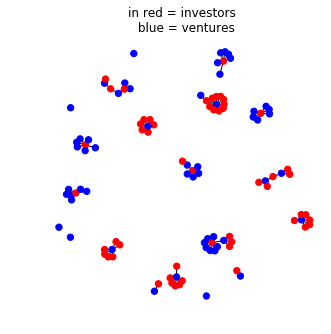

In [24]:
plt.figure(figsize=(5,5))
plt.title("in red = investors \n blue = ventures")
colors = []
for node_name in list(smallG.nodes()) :
    if node_name[:4] == 'inv_':
        colors.append("r")
    else:
        colors.append("b")
    
networkx.draw(smallG, node_size=40, pos=networkx.spring_layout(smallG), node_color=colors)
plt.show()

In [25]:
%%time
unfound = True
i = 0
while (unfound) :
    if (sizes[i] > 1000) :
        print("found", sizes[i])
        G_local = graphs[i]
        unfound = False
    if i%100 == 0:
        print(i)
    i += 1
    
    
plt.figure(figsize=(200,200))
plt.title("in red = investors \n blue = ventures")
colors = []
for node_name in list(G_local.nodes()) :
    if node_name[:4] == 'inv_':
        colors.append("r")
    else:
        colors.append("b")

#networkx.draw(G_local, node_size=200, pos=networkx.spring_layout(G_local), node_color=colors, linewidths = 0.5)
#plt.savefig("graph200_200_05.png")
del G_local

0
found 131844
CPU times: user 391 ms, sys: 15.6 ms, total: 406 ms
Wall time: 374 ms


In [26]:
import random
k = 1000
sampled_nodes = random.sample(graphs[0].nodes, k)
sampled_edges = []
for v,i in graphs[0].edges :
    if v in sampled_nodes and i in sampled_nodes:
        sampled_edges.append((v,i))

ValueError: Sample larger than population or is negative

In [ ]:
smallG2 = networkx.Graph()
smallG2.add_nodes_from(sampled_nodes)
smallG2.add_edges_from(sampled_edges)

In [ ]:
plt.figure(figsize=(50,50))
plt.title("in red = investors \n blue = ventures")
colors = []
for node_name in list(smallG2.nodes()) :
    if node_name[:4] == 'inv_':
        colors.append("r")
    else:
        colors.append("b")
    
networkx.draw(smallG2, node_size=50, pos=networkx.spring_layout(smallG2), node_color=colors, linewidths = 0.5)
plt.show()

In [27]:
pickle.dump(smallG2, open('output_data/small2Graph1000.p','wb'))